In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tqdm import tqdm
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
middle_dim = 128
encoding_dim = 32
image_size = mnist.train.images.shape[1]

inputs_ = tf.placeholder(tf.float32, (None, image_size), name='inputs')
targets_ = tf.placeholder(tf.float32, (None, image_size), name='targets')

middle_in = tf.layers.dense(inputs_, middle_dim, activation=tf.nn.relu)
encoded = tf.layers.dense(middle_in, encoding_dim, activation=tf.nn.relu)
middle_out = tf.layers.dense(encoded, middle_dim, activation=tf.nn.relu)


logits = tf.layers.dense(middle_out, image_size, activation=None)
decoded = tf.nn.sigmoid(logits, name='output')

loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
cost = tf.reduce_mean(loss)
opt = tf.train.AdamOptimizer(1e-3).minimize(cost)

Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [4]:
sess = tf.Session()

In [5]:
epochs = 20
batch_size = 500
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for _ in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))



Epoch: 1/20... Training loss: 0.6926
Epoch: 1/20... Training loss: 0.6877
Epoch: 1/20... Training loss: 0.6803
Epoch: 1/20... Training loss: 0.6700
Epoch: 1/20... Training loss: 0.6570
Epoch: 1/20... Training loss: 0.6411
Epoch: 1/20... Training loss: 0.6198
Epoch: 1/20... Training loss: 0.5950
Epoch: 1/20... Training loss: 0.5673
Epoch: 1/20... Training loss: 0.5367
Epoch: 1/20... Training loss: 0.5028
Epoch: 1/20... Training loss: 0.4693
Epoch: 1/20... Training loss: 0.4387
Epoch: 1/20... Training loss: 0.4088
Epoch: 1/20... Training loss: 0.3825
Epoch: 1/20... Training loss: 0.3595
Epoch: 1/20... Training loss: 0.3517
Epoch: 1/20... Training loss: 0.3337
Epoch: 1/20... Training loss: 0.3353
Epoch: 1/20... Training loss: 0.3299
Epoch: 1/20... Training loss: 0.3212
Epoch: 1/20... Training loss: 0.3208
Epoch: 1/20... Training loss: 0.3051
Epoch: 1/20... Training loss: 0.2956
Epoch: 1/20... Training loss: 0.2911
Epoch: 1/20... Training loss: 0.2947
Epoch: 1/20... Training loss: 0.2886
E

Epoch: 3/20... Training loss: 0.1389
Epoch: 3/20... Training loss: 0.1440
Epoch: 3/20... Training loss: 0.1427
Epoch: 3/20... Training loss: 0.1432
Epoch: 3/20... Training loss: 0.1421
Epoch: 3/20... Training loss: 0.1398
Epoch: 3/20... Training loss: 0.1461
Epoch: 3/20... Training loss: 0.1429
Epoch: 3/20... Training loss: 0.1411
Epoch: 3/20... Training loss: 0.1437
Epoch: 3/20... Training loss: 0.1405
Epoch: 3/20... Training loss: 0.1428
Epoch: 3/20... Training loss: 0.1413
Epoch: 3/20... Training loss: 0.1423
Epoch: 3/20... Training loss: 0.1399
Epoch: 3/20... Training loss: 0.1389
Epoch: 3/20... Training loss: 0.1414
Epoch: 3/20... Training loss: 0.1381
Epoch: 3/20... Training loss: 0.1401
Epoch: 3/20... Training loss: 0.1385
Epoch: 3/20... Training loss: 0.1444
Epoch: 3/20... Training loss: 0.1399
Epoch: 3/20... Training loss: 0.1414
Epoch: 3/20... Training loss: 0.1407
Epoch: 3/20... Training loss: 0.1411
Epoch: 3/20... Training loss: 0.1434
Epoch: 3/20... Training loss: 0.1423
E

Epoch: 4/20... Training loss: 0.1189
Epoch: 5/20... Training loss: 0.1210
Epoch: 5/20... Training loss: 0.1192
Epoch: 5/20... Training loss: 0.1181
Epoch: 5/20... Training loss: 0.1163
Epoch: 5/20... Training loss: 0.1160
Epoch: 5/20... Training loss: 0.1171
Epoch: 5/20... Training loss: 0.1138
Epoch: 5/20... Training loss: 0.1151
Epoch: 5/20... Training loss: 0.1187
Epoch: 5/20... Training loss: 0.1219
Epoch: 5/20... Training loss: 0.1175
Epoch: 5/20... Training loss: 0.1152
Epoch: 5/20... Training loss: 0.1176
Epoch: 5/20... Training loss: 0.1179
Epoch: 5/20... Training loss: 0.1156
Epoch: 5/20... Training loss: 0.1144
Epoch: 5/20... Training loss: 0.1187
Epoch: 5/20... Training loss: 0.1165
Epoch: 5/20... Training loss: 0.1184
Epoch: 5/20... Training loss: 0.1156
Epoch: 5/20... Training loss: 0.1195
Epoch: 5/20... Training loss: 0.1141
Epoch: 5/20... Training loss: 0.1173
Epoch: 5/20... Training loss: 0.1157
Epoch: 5/20... Training loss: 0.1178
Epoch: 5/20... Training loss: 0.1153
E

Epoch: 6/20... Training loss: 0.1099
Epoch: 6/20... Training loss: 0.1100
Epoch: 6/20... Training loss: 0.1108
Epoch: 6/20... Training loss: 0.1102
Epoch: 6/20... Training loss: 0.1096
Epoch: 6/20... Training loss: 0.1078
Epoch: 6/20... Training loss: 0.1090
Epoch: 6/20... Training loss: 0.1085
Epoch: 6/20... Training loss: 0.1107
Epoch: 6/20... Training loss: 0.1087
Epoch: 6/20... Training loss: 0.1105
Epoch: 6/20... Training loss: 0.1083
Epoch: 6/20... Training loss: 0.1094
Epoch: 6/20... Training loss: 0.1108
Epoch: 6/20... Training loss: 0.1100
Epoch: 7/20... Training loss: 0.1092
Epoch: 7/20... Training loss: 0.1080
Epoch: 7/20... Training loss: 0.1078
Epoch: 7/20... Training loss: 0.1075
Epoch: 7/20... Training loss: 0.1087
Epoch: 7/20... Training loss: 0.1073
Epoch: 7/20... Training loss: 0.1066
Epoch: 7/20... Training loss: 0.1112
Epoch: 7/20... Training loss: 0.1083
Epoch: 7/20... Training loss: 0.1085
Epoch: 7/20... Training loss: 0.1094
Epoch: 7/20... Training loss: 0.1047
E

Epoch: 9/20... Training loss: 0.1051
Epoch: 9/20... Training loss: 0.1012
Epoch: 9/20... Training loss: 0.1032
Epoch: 9/20... Training loss: 0.1019
Epoch: 9/20... Training loss: 0.1027
Epoch: 9/20... Training loss: 0.1031
Epoch: 9/20... Training loss: 0.1003
Epoch: 9/20... Training loss: 0.1011
Epoch: 9/20... Training loss: 0.1031
Epoch: 9/20... Training loss: 0.1001
Epoch: 9/20... Training loss: 0.1027
Epoch: 9/20... Training loss: 0.1016
Epoch: 9/20... Training loss: 0.1009
Epoch: 9/20... Training loss: 0.1007
Epoch: 9/20... Training loss: 0.1025
Epoch: 9/20... Training loss: 0.1037
Epoch: 9/20... Training loss: 0.1017
Epoch: 9/20... Training loss: 0.1031
Epoch: 9/20... Training loss: 0.1008
Epoch: 9/20... Training loss: 0.1029
Epoch: 9/20... Training loss: 0.1036
Epoch: 9/20... Training loss: 0.1008
Epoch: 9/20... Training loss: 0.0985
Epoch: 9/20... Training loss: 0.1016
Epoch: 9/20... Training loss: 0.1014
Epoch: 9/20... Training loss: 0.1013
Epoch: 9/20... Training loss: 0.1028
E

Epoch: 11/20... Training loss: 0.0994
Epoch: 11/20... Training loss: 0.0987
Epoch: 11/20... Training loss: 0.0981
Epoch: 11/20... Training loss: 0.0974
Epoch: 11/20... Training loss: 0.0985
Epoch: 11/20... Training loss: 0.0975
Epoch: 11/20... Training loss: 0.0975
Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20... Training loss: 0.0984
Epoch: 11/20... Training loss: 0.0982
Epoch: 11/20... Training loss: 0.1002
Epoch: 11/20... Training loss: 0.0987
Epoch: 11/20... Training loss: 0.1013
Epoch: 11/20... Training loss: 0.0983
Epoch: 11/20... Training loss: 0.0986
Epoch: 11/20... Training loss: 0.0993
Epoch: 11/20... Training loss: 0.0978
Epoch: 11/20... Training loss: 0.0975
Epoch: 11/20... Training loss: 0.0972
Epoch: 11/20... Training loss: 0.0991
Epoch: 11/20... Training loss: 0.1004
Epoch: 11/20... Training loss: 0.0976
Epoch: 11/20... Training loss: 0.1011
Epoch: 11/20... Training loss: 0.0995
Epoch: 11/20... Training loss: 0.0996
Epoch: 11/20... Training loss: 0.0986
Epoch: 11/20

Epoch: 13/20... Training loss: 0.0965
Epoch: 13/20... Training loss: 0.0955
Epoch: 13/20... Training loss: 0.0975
Epoch: 13/20... Training loss: 0.0975
Epoch: 13/20... Training loss: 0.0969
Epoch: 13/20... Training loss: 0.0950
Epoch: 13/20... Training loss: 0.0975
Epoch: 13/20... Training loss: 0.0956
Epoch: 13/20... Training loss: 0.0966
Epoch: 13/20... Training loss: 0.0962
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0940
Epoch: 13/20... Training loss: 0.0969
Epoch: 13/20... Training loss: 0.0941
Epoch: 13/20... Training loss: 0.0950
Epoch: 13/20... Training loss: 0.0963
Epoch: 13/20... Training loss: 0.0967
Epoch: 13/20... Training loss: 0.0967
Epoch: 13/20... Training loss: 0.0969
Epoch: 13/20... Training loss: 0.0963
Epoch: 13/20... Training loss: 0.0958
Epoch: 13/20... Training loss: 0.0959
Epoch: 13/20... Training loss: 0.0961
Epoch: 13/20... Training loss: 0.0954
Epoch: 13/20... Training loss: 0.0959
Epoch: 13/20... Training loss: 0.0990
Epoch: 13/20

Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0946
Epoch: 15/20... Training loss: 0.0946
Epoch: 15/20... Training loss: 0.0970
Epoch: 15/20... Training loss: 0.0946
Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20... Training loss: 0.0958
Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0945
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0961
Epoch: 15/20... Training loss: 0.0927
Epoch: 15/20... Training loss: 0.0915
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0923
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0961
Epoch: 15/20... Training loss: 0.0974
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0949
Epoch: 15/20... Training loss: 0.0960
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0976
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20

Epoch: 17/20... Training loss: 0.0928
Epoch: 17/20... Training loss: 0.0948
Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20... Training loss: 0.0962
Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20... Training loss: 0.0901
Epoch: 17/20... Training loss: 0.0921
Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20... Training loss: 0.0914
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0948
Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20... Training loss: 0.0919
Epoch: 17/20... Training loss: 0.0919
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0921
Epoch: 17/20... Training loss: 0.0910
Epoch: 17/20... Training loss: 0.0924
Epoch: 17/20... Training loss: 0.0920
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0916
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20

Epoch: 19/20... Training loss: 0.0922
Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20... Training loss: 0.0924
Epoch: 19/20... Training loss: 0.0920
Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0904
Epoch: 19/20... Training loss: 0.0904
Epoch: 19/20... Training loss: 0.0902
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0912
Epoch: 19/20... Training loss: 0.0913
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0924
Epoch: 19/20... Training loss: 0.0919
Epoch: 19/20... Training loss: 0.0914
Epoch: 19/20... Training loss: 0.0912
Epoch: 19/20... Training loss: 0.0920
Epoch: 19/20... Training loss: 0.0940
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0904
Epoch: 19/20... Training loss: 0.0923
Epoch: 19/20... Training loss: 0.0914
Epoch: 19/20... Training loss: 0.0920
Epoch: 19/20... Training loss: 0.0904
Epoch: 19/20... Training loss: 0.0902
Epoch: 19/20

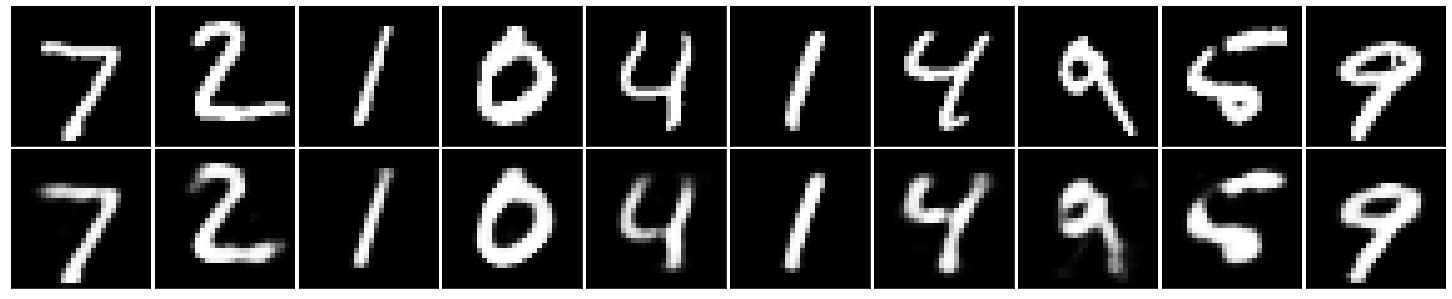

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [7]:
sess.close()